In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("framingham.csv", index_col=False)
df.shape
# categorical variables from the dfataset like male/female

(4238, 16)

In [3]:
#check for missing values
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
#about 650 rows in total have missing values >10% impute with mean for totChol, BMI, glucose and mode for education, cigsPerDay, BP meds
df['totChol'].fillna(df['totChol'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['glucose'].fillna(df['glucose'].mean(), inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mode()[0], inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)


In [6]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          1
glucose            0
TenYearCHD         0
dtype: int64

In [7]:
#remove 1 row with missing values for heart rate
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [4]:
#check for duplicates
df.duplicated().sum()

0

Text(0.5, 1.0, 'Age Distribution')

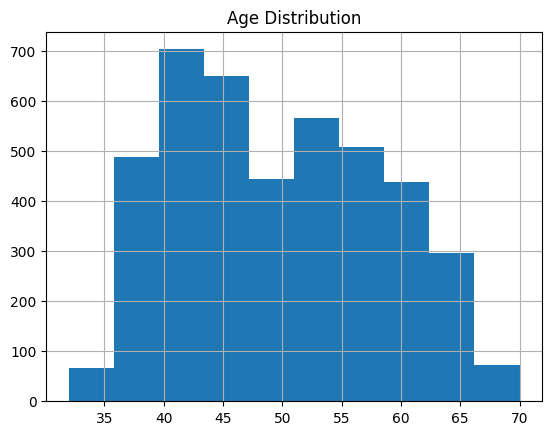

In [97]:
#age histogram
df['age'].hist()
#title
plt.title('Age Distribution')

Text(0.5, 1.0, 'Education Distribution')

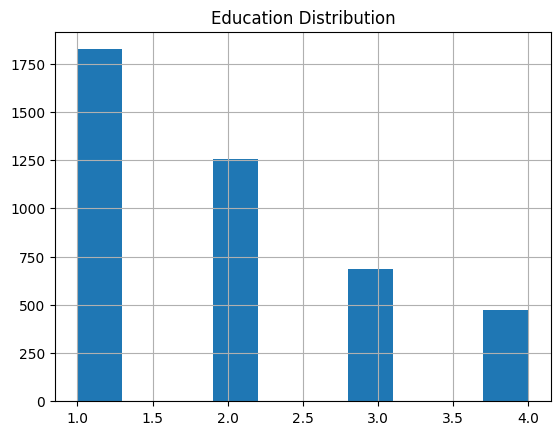

In [98]:
#education histogram
df['education'].hist()
#title
plt.title('Education Distribution')

Text(0.5, 1.0, 'CigsPerDay Distribution')

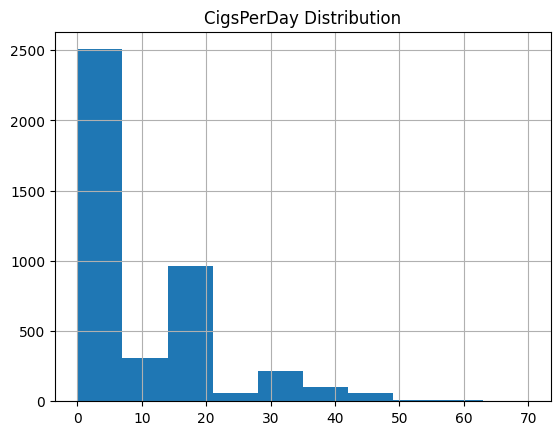

In [100]:
#cigsPerDay histogram 
df['cigsPerDay'].hist()
#title
plt.title('CigsPerDay Distribution')

Text(0.5, 1.0, 'Cholestrol Distribution')

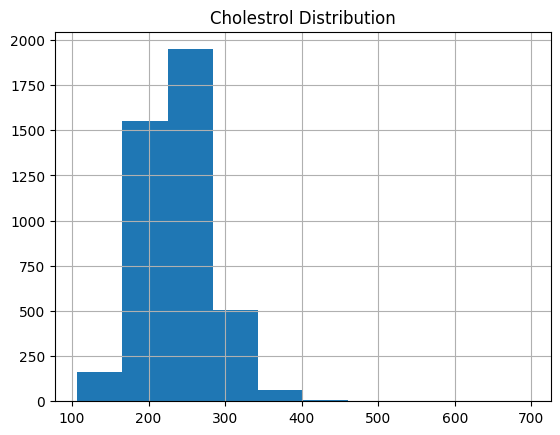

In [101]:
#cholestrol histogram
df['totChol'].hist()
#title
plt.title('Cholestrol Distribution')

Text(0.5, 1.0, 'Heart Rate Distribution')

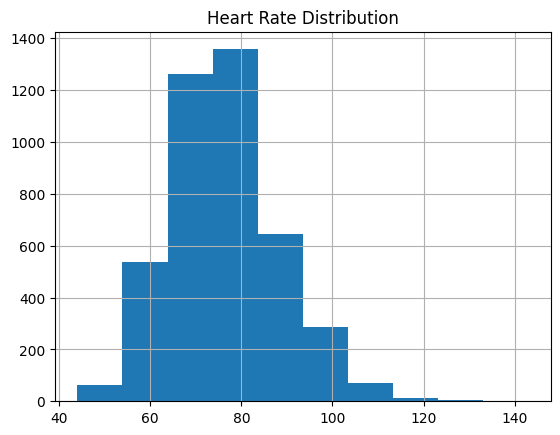

In [141]:
#heart rate histogram
df['heartRate'].hist()
#title
plt.title('Heart Rate Distribution')


Text(0.5, 1.0, 'Glucose Distribution')

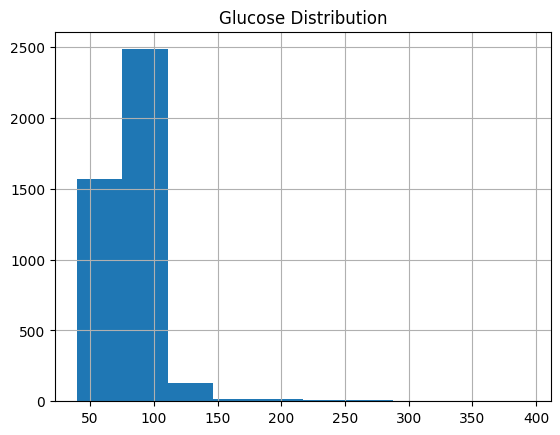

In [142]:
#glucose histogram
df['glucose'].hist()
#title
plt.title('Glucose Distribution')


Text(0.5, 1.0, 'Diabetes Distribution')

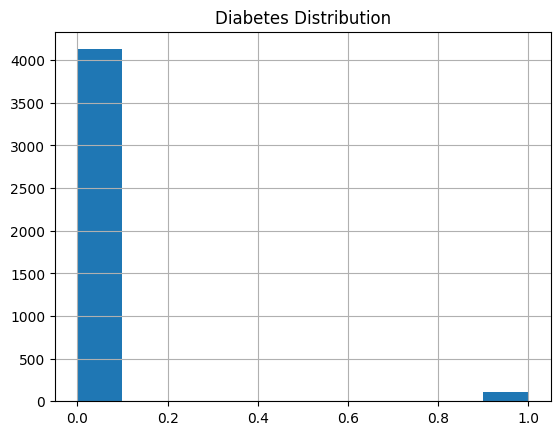

In [102]:
#diabetes histogram percentage of people with diabetes
df['diabetes'].hist()

#title
plt.title('Diabetes Distribution')

Text(0.5, 1.0, 'sys Blood Pressure Distribution')

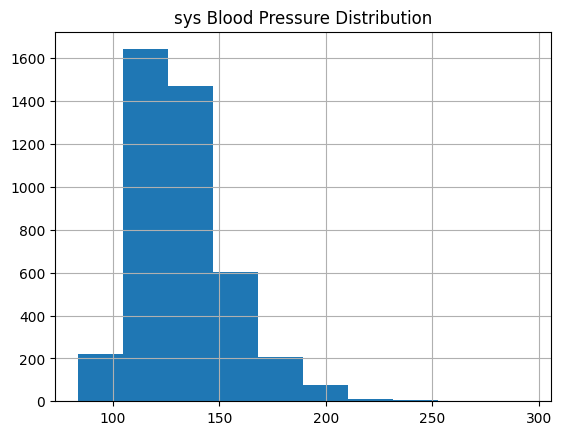

In [104]:
#blood pressure histogram
df['sysBP'].hist()
#title
plt.title('sys Blood Pressure Distribution')


Text(0.5, 1.0, 'dia Blood Pressure Distribution')

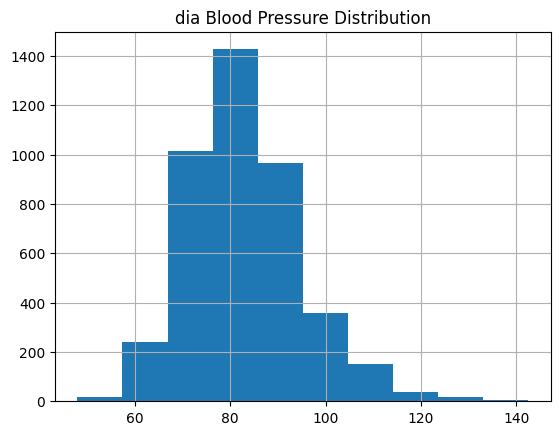

In [105]:
#blood pressure histogram
df['diaBP'].hist()
#title
plt.title('dia Blood Pressure Distribution')

Text(0.5, 1.0, 'BMI Distribution')

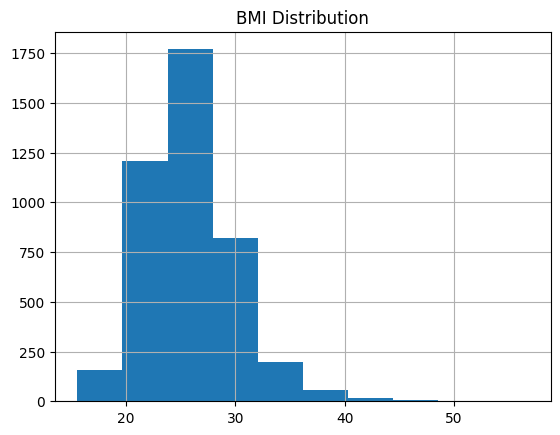

In [99]:
#BMI histogram
df['BMI'].hist()
#title
plt.title('BMI Distribution')

Text(0.5, 1.0, 'Age vs Cholestrol')

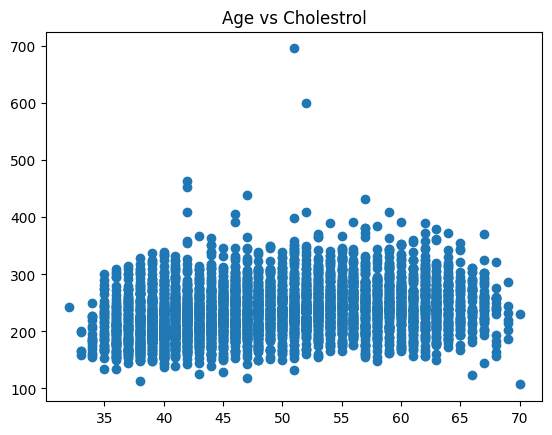

In [106]:
#bivariate analysis
#scatter plot of age and cholestrol
plt.scatter(df['age'], df['totChol'])
#title
plt.title('Age vs Cholestrol')


Text(0.5, 1.0, 'Age vs BMI')

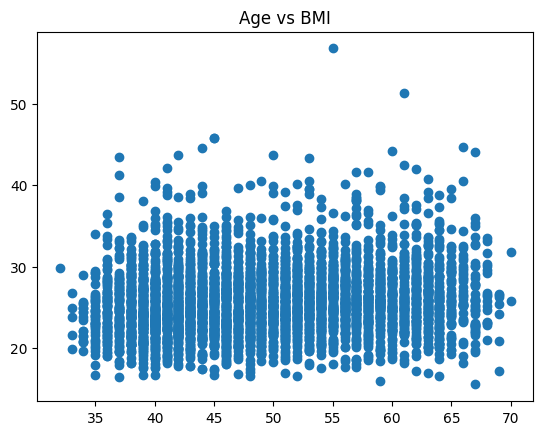

In [144]:
#age vs BMI
plt.scatter(df['age'], df['BMI'])
#title
plt.title('Age vs BMI')

In [129]:
import pandas as pd
from scipy.stats import shapiro

def test_normality(df):
    for col in df.columns:
        stat, p = shapiro(df[col])
        alpha = 0.05
        if p > alpha:
            print(f'{col}: data appears Gaussian (fail to reject H0) (p={p:.3f})')
        else:
            print(f'{col}: data does not appear Gaussian (reject H0) (p={p:.3f})')


In [174]:
#code for K-M test for normality
#test_normality(df[['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']])

In [173]:
#df = pd.read_csv('data.csv')  # replace with your own data
#test_normality(df)


<AxesSubplot:xlabel='cigsPerDay'>

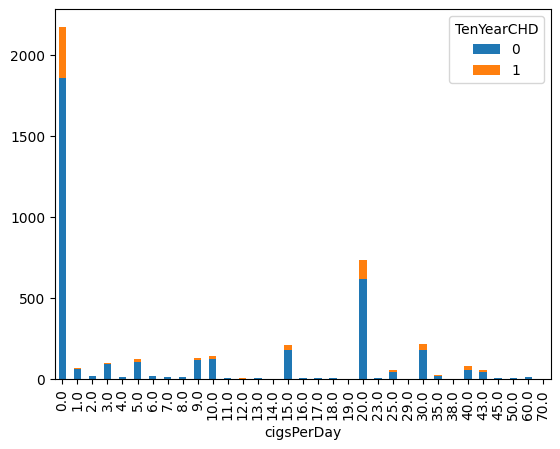

In [95]:
#stacked bar graph for cigsPerDay and TenYearCHD
df.groupby(['cigsPerDay', 'TenYearCHD']).size().unstack().plot(kind='bar', stacked=True)

Text(0.5, 1.0, 'Current Smoker Distribution')

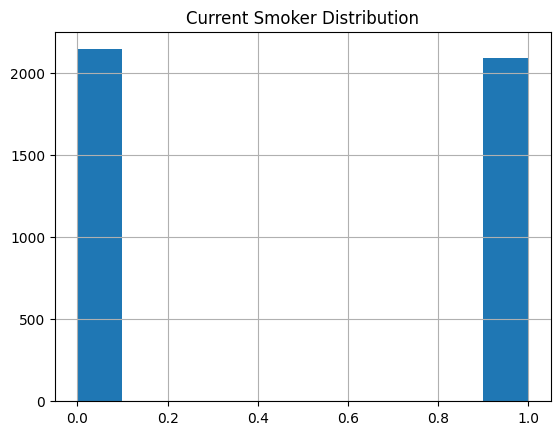

In [137]:
#current smoker histogram
df['currentSmoker'].hist()
#title
plt.title('Current Smoker Distribution')

Text(0.5, 1.0, 'Current Smoker vs TenYearCHD')

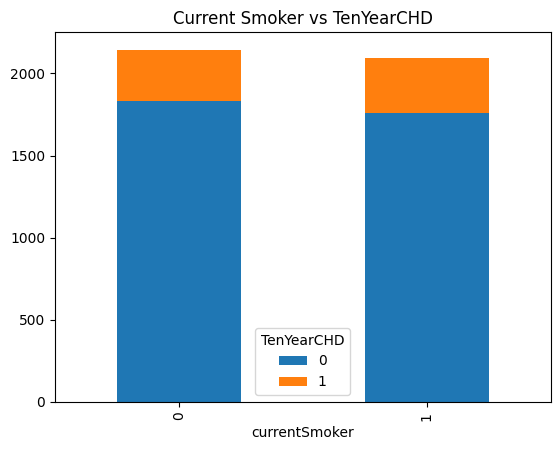

In [139]:
#stacked bar graph for currentSmoker and TenYearCHD
df.groupby(['currentSmoker', 'TenYearCHD']).size().unstack().plot(kind='bar', stacked=True)
#title
plt.title('Current Smoker vs TenYearCHD')

In [135]:
#chi-square test for currentSmoker and TenYearCHD
#H0: currentSmoker and TenYearCHD are independent
#H1: currentSmoker and TenYearCHD are dependent
from scipy.stats import chi2_contingency
from scipy.stats import chi2
table = pd.crosstab(df['currentSmoker'], df['TenYearCHD'])
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


dof=1
[[1818.63016285  325.36983715]
 [1775.36983715  317.63016285]]
probability=0.950, critical=3.841, stat=1.411
Independent (fail to reject H0)
significance=0.050, p=0.235
Independent (fail to reject H0)


In [132]:
#t test between BMI and TenYearCHD
#H0: BMI and TenYearCHD are independent
#H1: BMI and TenYearCHD are dependent
from scipy.stats import ttest_ind
# compare samples
stat, p = ttest_ind(df['BMI'], df['TenYearCHD'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')
#t test between cigsPerDay and TenYearCHD


Statistics=408.523, p=0.000
Different distributions (reject H0)


In [133]:
#t test between MAP and TenYearCHD
#H0: MAP and TenYearCHD are independent
#H1: MAP and TenYearCHD are dependent
#df['Mean arterial pressure']
from scipy.stats import ttest_ind
# compare samples
stat, p = ttest_ind(df['Mean arterial pressure'], df['TenYearCHD'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')
#t test between cigsPerDay and TenYearCHD


Statistics=447.150, p=0.000
Different distributions (reject H0)


In [134]:
#t test between totChol and TenYearCHD
#H0: totChol and TenYearCHD are independent
#H1: totChol and TenYearCHD are dependent
#df['Mean arterial pressure']
#df['totChol']
from scipy.stats import ttest_ind
# compare samples
stat, p = ttest_ind(df['totChol'], df['TenYearCHD'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')
#t test between cigsPerDay and TenYearCHD


Statistics=347.357, p=0.000
Different distributions (reject H0)


In [121]:
df['Mean arterial pressure'] = (df['sysBP'] + 2*df['diaBP'])/3

In [127]:
#ANOVA dependency test between BMI and TenYearCHD

import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('TenYearCHD ~ C(BMI)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)



              sum_sq      df         F    PR(>F)
C(BMI)    187.560211  1363.0  1.104761  0.015403
Residual  357.859189  2873.0       NaN       NaN


In [123]:
#dependency test between 2 categorical variables
#H0: Diabetes and TenYearCHD are independent
#H1: Diabetes and TenYearCHD are dependent
from scipy.stats import chi2_contingency
from scipy.stats import chi2
table = pd.crosstab(df['diabetes'], df['TenYearCHD'])
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    



dof=1
[[3501.54165683  626.45834317]
 [  92.45834317   16.54165683]]
probability=0.950, critical=3.841, stat=38.557
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


Text(0.5, 1.0, 'Diabetes and TenYearCHD')

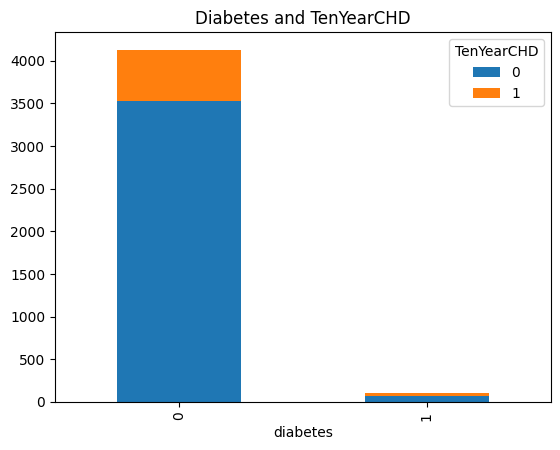

In [140]:
#plot diabetes and TenYearCHD
df.groupby(['diabetes', 'TenYearCHD']).size().unstack().plot(kind='bar', stacked=True)
#title
plt.title('Diabetes and TenYearCHD')


<AxesSubplot:>

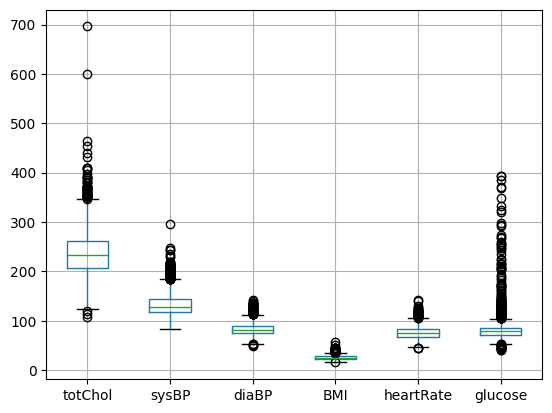

In [18]:
#outlier detection
df.boxplot(column=['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'])

In [13]:
#correration matrix heatmap
import seaborn as sns
corr = df.corr()
corr
#heatmap correlation matrix

#sns.heatmap(corr,

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029451,0.013557,0.197376,0.315494,-0.051506,-0.004526,0.004910,0.015755,-0.069877,-0.036505,0.058126,0.081293,-0.116620,0.005711,0.087856
age,-0.029451,1.000000,-0.164509,-0.214247,-0.192226,0.121065,0.057705,0.306785,0.101356,0.260521,0.393864,0.206447,0.135000,-0.012823,0.116735,0.224541
education,0.013557,-0.164509,1.000000,0.019631,0.010075,-0.010189,-0.032902,-0.078506,-0.038187,-0.023625,-0.125857,-0.062889,-0.139324,-0.049609,-0.034215,-0.052329
currentSmoker,0.197376,-0.214247,0.019631,1.000000,0.760201,-0.048323,-0.032973,-0.103655,-0.044262,-0.046196,-0.130732,-0.107607,-0.167515,0.062356,-0.054259,0.018907
cigsPerDay,0.315494,-0.192226,0.010075,0.760201,1.000000,-0.044647,-0.032232,-0.065335,-0.036124,-0.026747,-0.088743,-0.056575,-0.092500,0.073871,-0.056726,0.058477
BPMeds,-0.051506,0.121065,-0.010189,-0.048323,-0.044647,1.000000,0.114606,0.258826,0.051388,0.078697,0.251677,0.192339,0.099691,0.015139,0.048874,0.086571
prevalentStroke,-0.004526,0.057705,-0.032902,-0.032973,-0.032232,0.114606,1.000000,0.074876,0.006946,0.000059,0.057064,0.045181,0.024857,-0.017676,0.018063,0.061894
prevalentHyp,0.004910,0.306785,-0.078506,-0.103655,-0.065335,0.258826,0.074876,1.000000,0.077886,0.163227,0.696569,0.616178,0.300375,0.147261,0.082808,0.176935
diabetes,0.015755,0.101356,-0.038187,-0.044262,-0.036124,0.051388,0.006946,0.077886,1.000000,0.040077,0.111397,0.050307,0.086290,0.048994,0.605734,0.097472
totChol,-0.069877,0.260521,-0.023625,-0.046196,-0.026747,0.078697,0.000059,0.163227,0.040077,1.000000,0.207866,0.163852,0.114882,0.090677,0.044622,0.081903


<AxesSubplot:>

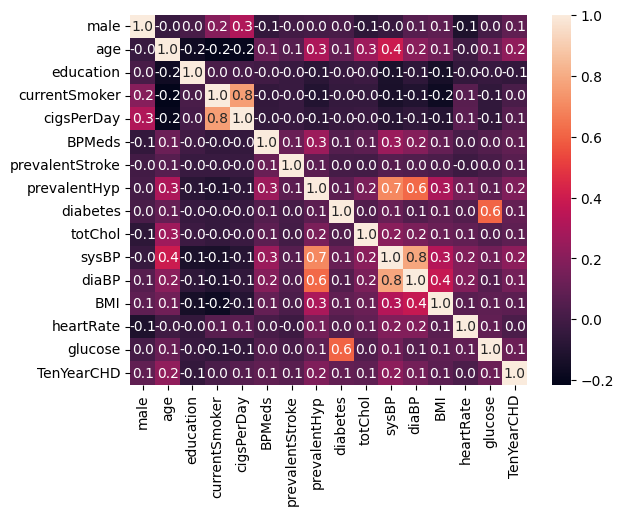

In [16]:
#heatmap correlation matrix with values

sns.heatmap(corr, annot=True, fmt=".1f")

Text(0.5, 1.0, 'Glucose vs Cholestrol')

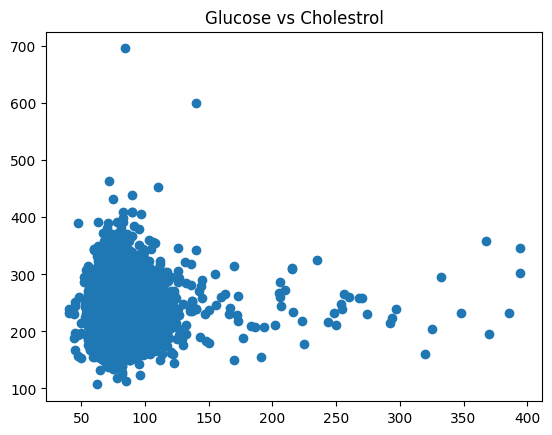

In [114]:
#bivariate analysis
#scatter plot of age and cholestrol
#glucose and cholestrol
plt.scatter(df['glucose'], df['totChol'])
#title
plt.title('Glucose vs Cholestrol')

Text(0.5, 1.0, 'BMI vs Cholestrol')

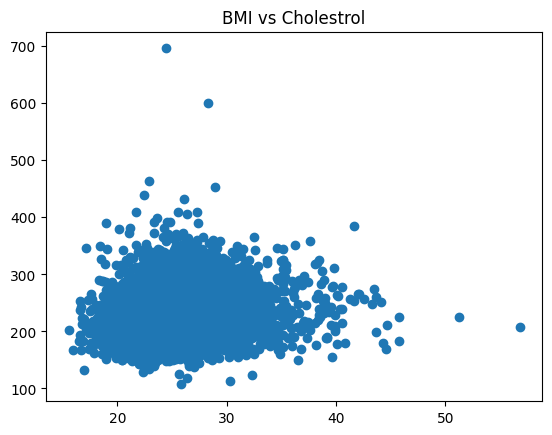

In [115]:
#BMI and cholestrol
plt.scatter(df['BMI'], df['totChol'])
#title
plt.title('BMI vs Cholestrol')


Text(0.5, 1.0, 'Glucose vs BMI')

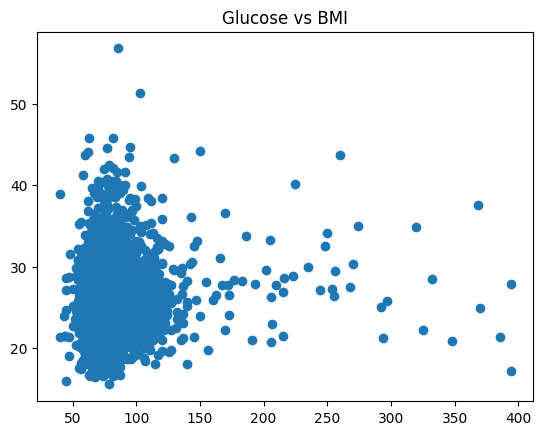

In [116]:
#glucose and bmi
plt.scatter(df['glucose'], df['BMI'])
#title
plt.title('Glucose vs BMI')


Text(0.5, 1.0, 'Age vs Glucose')

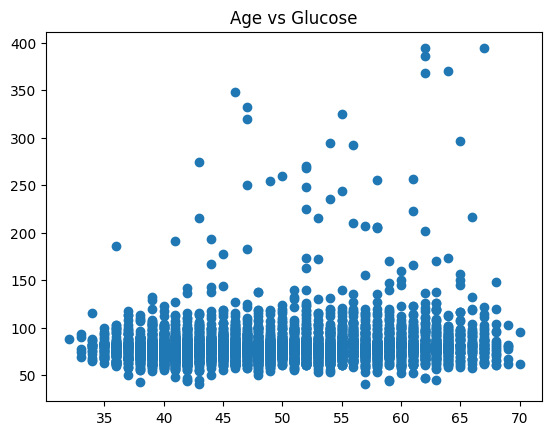

In [117]:
#age and glucose
plt.scatter(df['age'], df['glucose'])
#title
plt.title('Age vs Glucose')


In [ ]:
#cigsPerDay is highly correlated with currentSmoker 0.8
#prevalentHyp is highly correlated with sysBP 0.7
#glucose is highly correlated with diabetes 0.6
#one hot encoding was not used in this case because the categorical variables are ordinal

In [146]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Mean arterial pressure
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0,82.000000
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0,94.333333
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0,95.833333
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1,113.333333
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0,99.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1,121.000000
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0,95.500000
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0,91.666667
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0,100.166667


Text(0.5, 1.0, 'Prevalent Hypertension vs BMI')

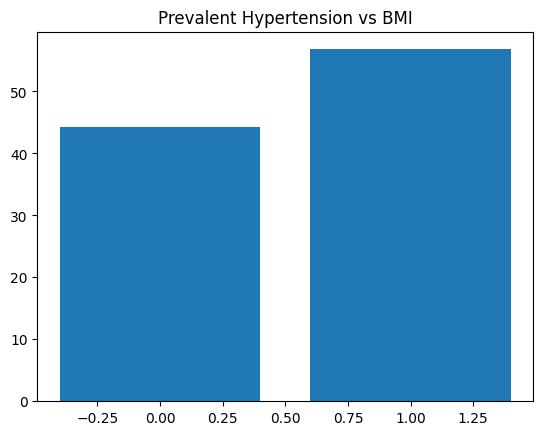

In [153]:
#bar prevalentHyper vs BMI

plt.bar(df['prevalentHyp'], df['BMI'])
#title
plt.title('Prevalent Hypertension vs BMI')

Text(0.5, 1.0, 'Prevalent Hypertension vs age')

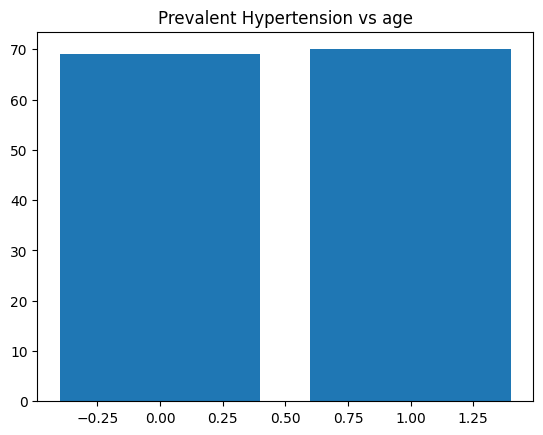

In [154]:
#bar prevalentHyper vs BMI

plt.bar(df['prevalentHyp'], df['age'])
#title
plt.title('Prevalent Hypertension vs age')